### Problem 1

In [1]:
library(hexView)

In [2]:
data <- readEViews('EXPEND.WF1')
head(data)

Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”
Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”


,Date,AIR,CLOT,COSM,DATE,DENT,DOC,DPI,FOOD,FUEL,⋯,PTOB,PTPE,PWAT,REC,TAB,TELE,TIME,TOB,TPE,WAT
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1959-01-01,0.9,36.3,3.1,1959,3.2,8.8,479.7,99.7,5.2,⋯,61.0,70.6,58.4,9.6,2.6,4.7,1,10.7,440.4,2.0
2,1960-01-01,0.9,36.6,3.5,1960,3.2,9.0,489.7,100.9,5.0,⋯,63.2,71.9,60.2,10.0,2.5,5.0,2,10.9,452.0,2.2
3,1961-01-01,1.0,37.3,3.9,1961,3.3,9.1,503.8,102.5,4.7,⋯,63.8,72.6,61.8,10.4,2.5,5.4,3,11.2,461.4,2.3
4,1962-01-01,1.1,38.9,4.2,1962,3.5,9.8,524.9,103.5,4.7,⋯,64.4,73.7,63.4,10.9,2.6,5.7,4,11.2,482.0,2.5
5,1963-01-01,1.2,39.6,4.5,1963,3.4,10.2,542.3,104.6,4.9,⋯,65.8,74.8,65.4,11.3,2.5,6.1,5,11.4,500.5,2.7
6,1964-01-01,1.4,42.6,4.8,1964,3.9,11.9,580.8,108.8,5.2,⋯,67.1,75.9,66.5,11.6,2.8,6.6,6,11.3,528.0,2.8


In [3]:
dim(data)

[1] 25 67

In [4]:
summary(lm(HOUS~DPI, data = data))


Call:
lm(formula = HOUS ~ DPI, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.897 -3.172  0.332  4.040  5.905 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.571737   3.373796  -8.172 2.97e-08 ***
DPI           0.178746   0.004196  42.599  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.092 on 23 degrees of freedom
Multiple R-squared:  0.9875,	Adjusted R-squared:  0.9869 
F-statistic:  1815 on 1 and 23 DF,  p-value: < 2.2e-16


In [5]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



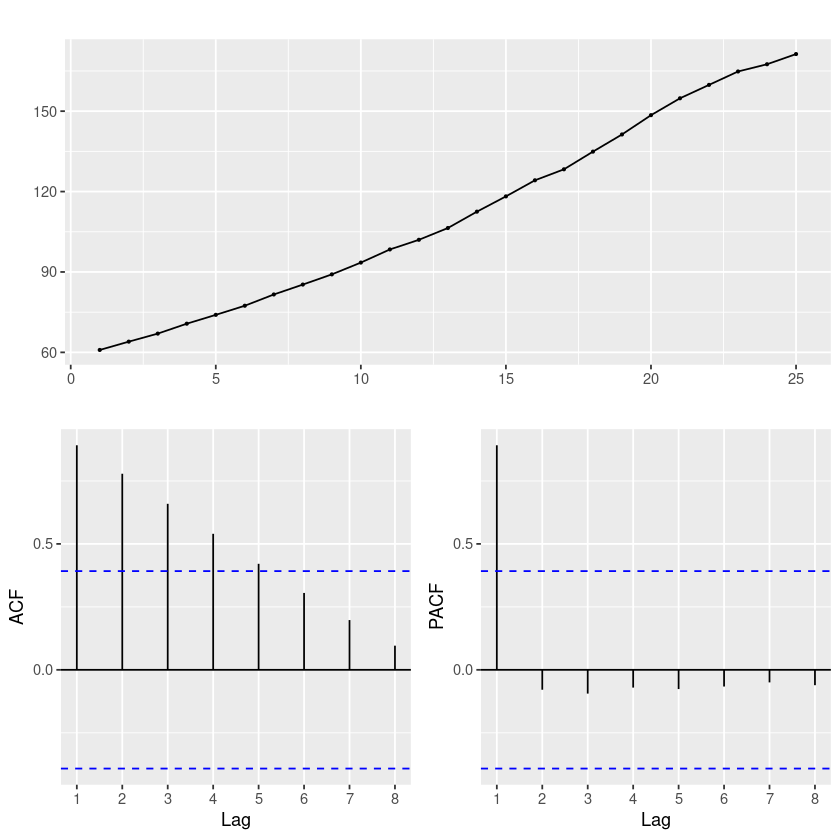

In [6]:
ggtsdisplay(ts(data[['HOUS']]))

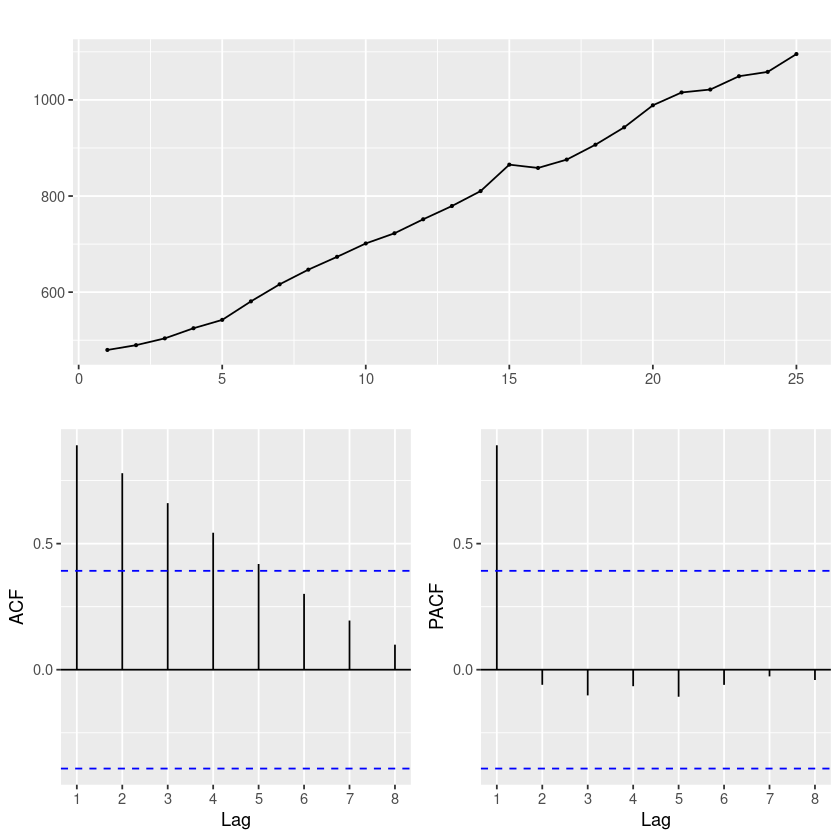

In [7]:
ggtsdisplay(ts(data[['DPI']]))

In [8]:
summary(lm(HOUS~DPI+DATE, data = data))


Call:
lm(formula = HOUS ~ DPI + DATE, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4225 -3.4529 -0.1598  3.1525  6.1772 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -7.316e+03  3.206e+03  -2.282   0.0325 *
DPI          4.029e-02  6.102e-02   0.660   0.5160  
DATE         3.753e+00  1.651e+00   2.274   0.0331 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.765 on 22 degrees of freedom
Multiple R-squared:  0.9899,	Adjusted R-squared:  0.9889 
F-statistic:  1074 on 2 and 22 DF,  p-value: < 2.2e-16


In [10]:
library('dynlm')

In [11]:
h1 = ts(data['HOUS'], start = c(1959))
d1 = ts(data['DPI'], start = c(1959))

In [16]:
# lag(h1,3)

In [12]:
#ARDL(0,1)
summary(dynlm(h1~d1+L(d1,1), data = data))


Time series regression with "ts" data:
Start = 1960, End = 1983

Call:
dynlm(formula = h1 ~ d1 + L(d1, 1), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4223 -3.5807  0.9818  3.1626  4.6685 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -25.67396    3.45641  -7.428 2.65e-07 ***
d1            0.03563    0.05771   0.618   0.5435    
L(d1, 1)      0.14528    0.05803   2.503   0.0206 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.716 on 21 degrees of freedom
Multiple R-squared:  0.9897,	Adjusted R-squared:  0.9887 
F-statistic:  1006 on 2 and 21 DF,  p-value: < 2.2e-16


In [17]:
#ARDL(0,3)
summary(dynlm(h1~d1+L(d1,1)+L(d1,2)+L(d1,3), data = data))


Time series regression with "ts" data:
Start = 1962, End = 1983

Call:
dynlm(formula = h1 ~ d1 + L(d1, 1) + L(d1, 2) + L(d1, 3), data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-4.593 -2.595  0.812  2.854  3.719 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.698788   4.196254  -5.648 2.89e-05 ***
d1            0.041250   0.054211   0.761   0.4571    
L(d1, 1)      0.036869   0.071478   0.516   0.6126    
L(d1, 2)      0.002094   0.075369   0.028   0.9782    
L(d1, 3)      0.104558   0.054182   1.930   0.0705 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.258 on 17 degrees of freedom
Multiple R-squared:  0.9921,	Adjusted R-squared:  0.9903 
F-statistic:   536 on 4 and 17 DF,  p-value: < 2.2e-16


In [18]:
#ARDL(0,10) with restrictions 
summary(dynlm(h1~d1+L(d1,1)+L(d1,2)+L(d1,10), data = data))


Time series regression with "ts" data:
Start = 1969, End = 1983

Call:
dynlm(formula = h1 ~ d1 + L(d1, 1) + L(d1, 2) + L(d1, 10), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5567 -0.6465  0.1302  0.8847  1.5968 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.73107    6.18439  -5.939 0.000143 ***
d1            0.06610    0.02562   2.580 0.027413 *  
L(d1, 1)      0.07144    0.03160   2.261 0.047303 *  
L(d1, 2)      0.01759    0.03016   0.583 0.572633    
L(d1, 10)     0.05099    0.02181   2.338 0.041510 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.387 on 10 degrees of freedom
Multiple R-squared:  0.9978,	Adjusted R-squared:  0.9969 
F-statistic:  1126 on 4 and 10 DF,  p-value: 3.201e-13


### Problem 2

In [19]:
# ARDL(1,0)
c1 = summary(dynlm(h1~d1+L(h1), data = data))
c1


Time series regression with "ts" data:
Start = 1960, End = 1983

Call:
dynlm(formula = h1 ~ d1 + L(h1), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5992 -0.7073  0.1632  0.5990  1.5120 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.634296   1.471592  -1.790 0.087868 .  
d1           0.029204   0.007269   4.018 0.000623 ***
L(h1)        0.854534   0.040887  20.900 1.55e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.907 on 21 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9993 
F-statistic: 1.705e+04 on 2 and 21 DF,  p-value: < 2.2e-16


In [20]:
c1$coefficients[2,1]/(1-c1$coefficients[3,1])

[1] 0.2007593

In [ ]:
c1$coefficients

In [ ]:
c1 = ts(data['COSM'], frequency = 4, start = c(1959))

In [ ]:
summary(dynlm(c1~d1+L(c1), data = data))